In [141]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder , OrdinalEncoder,OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,root_mean_squared_error,r2_score,mean_absolute_error

In [142]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [143]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [144]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [145]:
df = pd.read_csv(r"C:\Users\Saleem\Downloads\house price prediction dataset.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [146]:
df.shape

(1460, 81)

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [148]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [149]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [150]:
pd.set_option('display.max_rows', None)      # Show all rows
pd.set_option('display.max_columns', None)   # Show all columns

# Then run your code
print((df.isnull().sum() / len(df)) * 100)

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType       59.726027
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

In [151]:
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

I used groupby and median on columns with missing values to evaluate whether they have a meaningful relationship with SalePrice. If the median prices vary significantly across categories, I retain the feature  otherwise, I consider dropping it.

In [152]:
# Check average price by alley access type
df.groupby('Alley')['SalePrice'].median()

Alley
Grvl    119500.0
Pave    172500.0
Name: SalePrice, dtype: float64

In [153]:
df.groupby('MasVnrType')['SalePrice'].median()

MasVnrType
BrkCmn     139000.0
BrkFace    181000.0
Stone      246839.0
Name: SalePrice, dtype: float64

In [154]:
df.groupby('FireplaceQu')['SalePrice'].median()

FireplaceQu
Ex    314250.0
Fa    158000.0
Gd    206950.0
Po    131500.0
TA    187500.0
Name: SalePrice, dtype: float64

In [155]:
df['PoolQC'].value_counts()

PoolQC
Gd    3
Ex    2
Fa    2
Name: count, dtype: int64

In [156]:
df.groupby('PoolQC')['SalePrice'].median()

PoolQC
Ex    490000.0
Fa    215500.0
Gd    171000.0
Name: SalePrice, dtype: float64

In [157]:
df.groupby('Fence')['SalePrice'].median()

Fence
GdPrv    167500.0
GdWo     138750.0
MnPrv    137450.0
MnWw     130000.0
Name: SalePrice, dtype: float64

In [158]:
df.groupby('MiscFeature')['SalePrice'].median()

MiscFeature
Gar2    170750.0
Othr     94000.0
Shed    144000.0
TenC    250000.0
Name: SalePrice, dtype: float64

In [159]:
#dropping this columns beacuse they have null columns and they are not effecting to the target variable
df.drop(columns=['PoolQC','MiscFeature'],inplace=True)

In [160]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,NaN,0,12,2008,WD,Normal,250000


IMPUTING NULL VALUES

In [161]:
df['LotFrontage'].value_counts()

LotFrontage
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: count, Length: 110, dtype: int64

In [162]:
#imputing 'LotFrontage' with the median 
df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].median())

In [163]:
df['Alley'].value_counts()

Alley
Grvl    50
Pave    41
Name: count, dtype: int64

In [164]:
#Alley feature is showing importance in this domain so we are filling null values with NoAllley
df['Alley'] = df['Alley'].fillna('NoAlley')

In [165]:
df['MasVnrType'].value_counts()

MasVnrType
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64

In [166]:
df['MasVnrType'] = df['MasVnrType'].fillna('None')

In [167]:
df['BsmtQual'].value_counts()

BsmtQual
TA    649
Gd    618
Ex    121
Fa     35
Name: count, dtype: int64

In [168]:
df['BsmtQual'] = df['BsmtQual'].fillna('NoBasement')

In [169]:
df['BsmtCond'].value_counts()

BsmtCond
TA    1311
Gd      65
Fa      45
Po       2
Name: count, dtype: int64

In [170]:
df['BsmtCond'] = df['BsmtCond'].fillna('NoBasement') 

In [171]:
df['BsmtExposure'] = df['BsmtExposure'].fillna('NoBasement')

In [172]:
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('NoBasement')

In [173]:
df['BsmtFinType2'] =df['BsmtFinType2'].fillna('NoBasement') 

In [174]:
df['FireplaceQu'] =df['FireplaceQu'].fillna('NoFireplace') 

In [175]:
df['GarageType'] = df['GarageType'].fillna('None')

In [176]:
df['GarageYrBlt'] = df['GarageYrBlt'].fillna('None')

In [177]:
df['GarageFinish'] = df['GarageFinish'].fillna('None')

In [178]:
df['Fence'] = df['Fence'].fillna('NoFence')

In [179]:
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)

In [180]:
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode())

In [181]:
df['GarageQual'] = df['GarageQual'].fillna('None')

In [182]:
df['GarageCond'] = df['GarageCond'].fillna('None')

In [183]:
pd.set_option('display.max_rows', None)      # Show all rows
pd.set_option('display.max_columns', None)   # Show all columns

# Then run your code
print((df.isnull().sum() / len(df)) * 100)

Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.000000
LotArea          0.000000
Street           0.000000
Alley            0.000000
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
OverallQual      0.000000
OverallCond      0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
MasVnrType       0.000000
MasVnrArea       0.000000
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
BsmtQual         0.000000
BsmtCond         0.000000
BsmtExposure     0.000000
BsmtFinType1     0.000000
BsmtFinSF1       0.000000
BsmtFinType2     0.000000
BsmtFinSF2       0.000000
BsmtUnfSF        0.000000
TotalBsmtSF 

In [184]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


<Axes: >

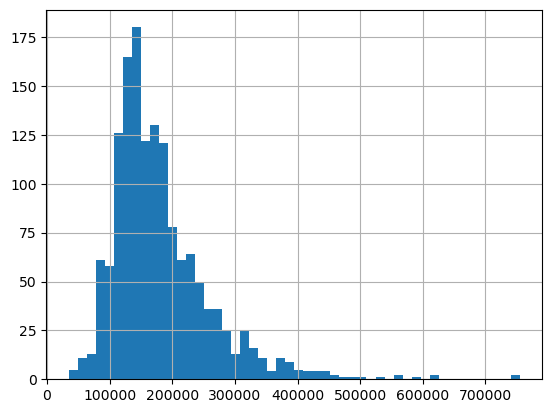

In [185]:
#target variable histogram
df['SalePrice'].hist(bins=50)

<Axes: >

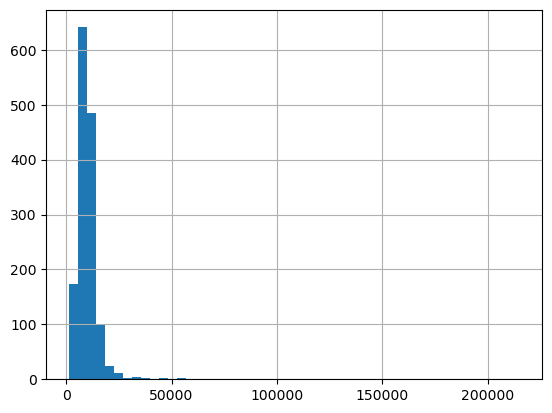

In [186]:
df['LotArea'].hist(bins=50)

<Axes: >

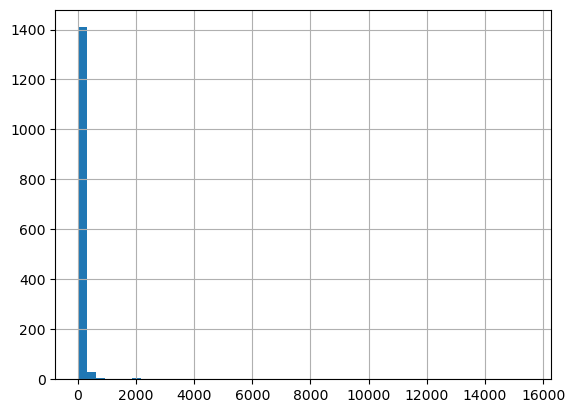

In [187]:
df['MiscVal'].hist(bins=50)

In [188]:
num_cols = df.select_dtypes(include=['float','int'])

In [189]:
corr_matrix = num_cols.corr()

<Axes: >

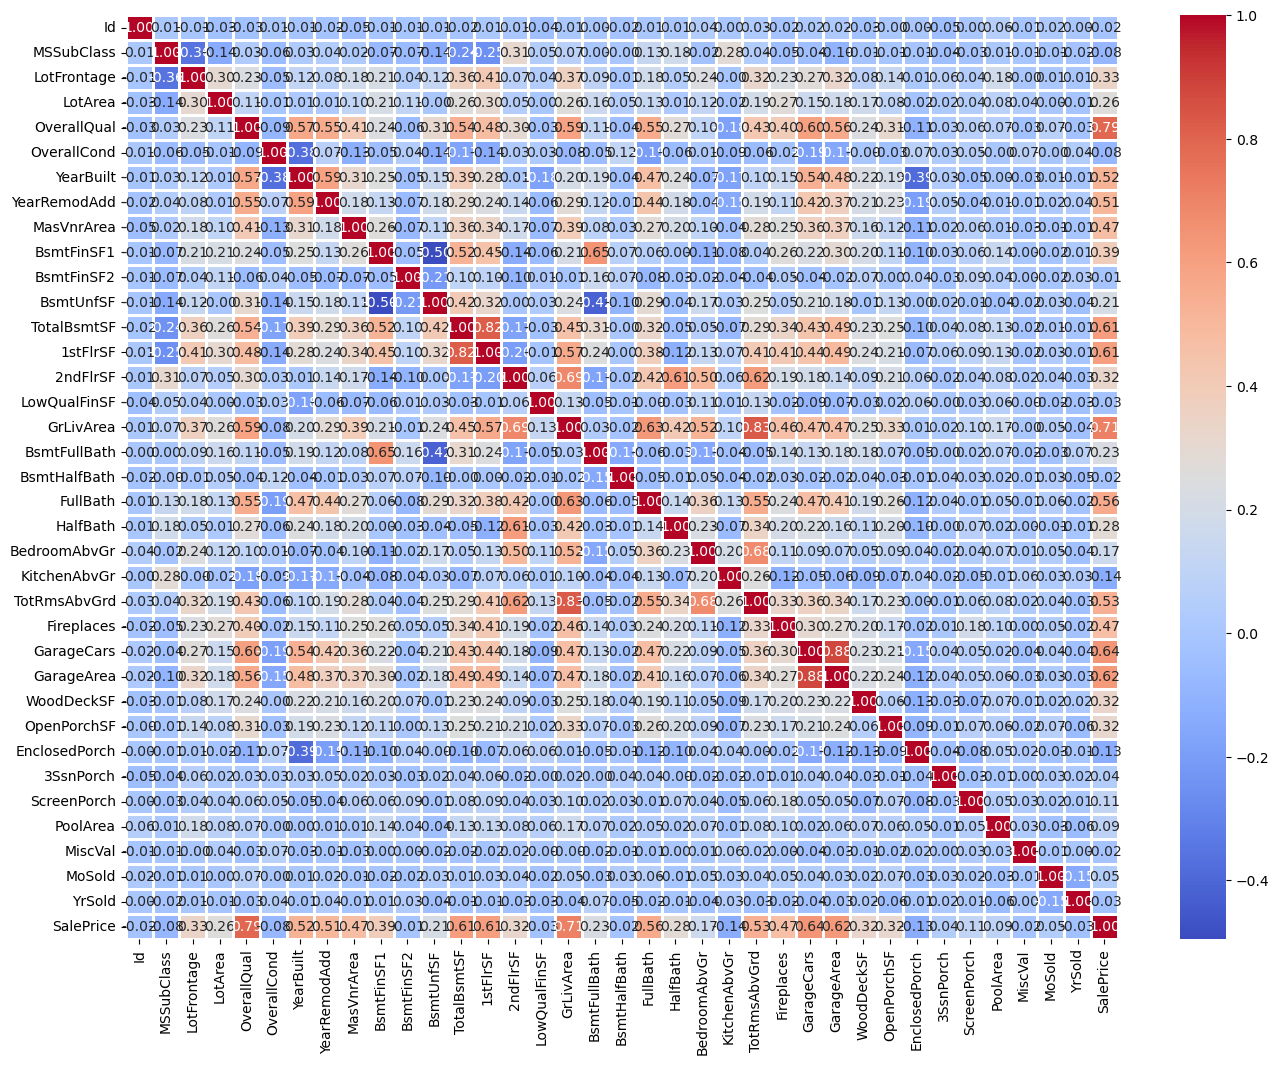

In [190]:
plt.figure(figsize=(16, 12))
sns.heatmap(
    corr_matrix,
    cmap='coolwarm',      
    annot=True,           
    fmt=".2f",            
    linewidths=1       
)

In [191]:
#Identify highly correlated pairs
corr_matrix = num_cols.corr().abs()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr_pairs = [column for column in upper_tri.columns if any(upper_tri[column] > 0.8)]
print(high_corr_pairs)

['1stFlrSF', 'TotRmsAbvGrd', 'GarageArea']


we use models like random forest and xgboost,lightgbm we can keep all of them these models are not hurt by multicollinearity because they do feature selection internally.

In [192]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NoFireplace,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NoFence,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NoAlley,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NoFence,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NoAlley,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NoFence,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NoAlley,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NoFence,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NoAlley,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NoFence,0,12,2008,WD,Normal,250000


CHECKING FEATURES VALUES BEHAVIOUR TO ENCODE FEATURES

In [193]:
cat_cols = df.select_dtypes(include='object').columns.tolist()

In [194]:
cat_summary = pd.DataFrame({
    'Feature': cat_cols,
    'Unique_Values': [df[col].nunique() for col in cat_cols],
    'Missing_%': [df[col].isnull().mean() * 100 for col in cat_cols],
    'Sample_Values': [df[col].dropna().unique()[:5] for col in cat_cols]
})
cat_summary.sort_values('Unique_Values', inplace=True)
display(cat_summary)


,Feature,Unique_Values,Missing_%,Sample_Values
1,Street,2,0.000000,"[Pave, Grvl]"
5,Utilities,2,0.000000,"[AllPub, NoSeWa]"
28,CentralAir,2,0.000000,"[Y, N]"
2,Alley,3,0.000000,"[NoAlley, Grvl, Pave]"
7,LandSlope,3,0.000000,"[Gtl, Mod, Sev]"
38,PavedDrive,3,0.000000,"[Y, N, P]"
3,LotShape,4,0.000000,"[Reg, IR1, IR2, IR3]"
4,LandContour,4,0.000000,"[Lvl, Bnk, Low, HLS]"
18,ExterQual,4,0.000000,"[Gd, TA, Ex, Fa]"
17,MasVnrType,4,0.000000,"[BrkFace, None, Stone, BrkCmn]"


In [195]:
ordinal_cols = [
    'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC',
    'KitchenQual', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond',
    'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Functional'
]

In [196]:
nominal_low_card = [
    'Street', 'Alley', 'LotShape', 'LandContour', 'LandSlope',
    'Utilities', 'LotConfig', 'Condition1', 'Condition2', 'BldgType',
    'HouseStyle', 'RoofStyle', 'RoofMatl','Fence','MasVnrType',
    'Foundation', 'Heating', 'CentralAir', 'Electrical','PavedDrive',
    'GarageType', 'SaleType', 'SaleCondition', 'MSZoning'
]

In [197]:
nominal_high_card = [
    'Neighborhood', 'Exterior1st', 'Exterior2nd'
]

In [198]:
#Ordinal Encoding
ordinal_maps = {
    'ExterQual':      {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'ExterCond':      {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'BsmtQual':       {'NoBasement': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4},
    'BsmtCond':       {'NoBasement': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4},
    'HeatingQC':      {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'KitchenQual':    {'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4},
    'FireplaceQu':    {'NoFireplace': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'GarageFinish':   {'None': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3},
    'GarageQual':     {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'GarageCond':     {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4},
    'BsmtExposure':   {'NoBasement': 0, 'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4},
    'BsmtFinType1':   {'NoBasement': 0, 'Unf': 1, 'Rec': 2, 'BLQ': 3, 'ALQ': 4, 'GLQ': 5},
    'BsmtFinType2':   {'NoBasement': 0, 'Unf': 1, 'Rec': 2, 'BLQ': 3, 'ALQ': 4, 'GLQ': 5},
    'Functional':     {'Sal': 1, 'Sev': 2, 'Maj2': 3, 'Maj1': 4, 'Mod': 5, 'Min2': 6, 'Min1': 7, 'Typ': 8}
}

In [199]:
for col, mapping in ordinal_maps.items():
    if col in df.columns:
        df[col] = df[col].map(mapping)

In [200]:
# Keep only valid columns that still exist in df
valid_nominal_low_card = [col for col in nominal_low_card if col in df.columns]


In [201]:
# One-Hot Encode only valid columns
df = pd.get_dummies(df, columns=valid_nominal_low_card, drop_first=True, dtype=int)

In [202]:
#Frequency Encoding for High-Cardinality Nominal Features
for col in nominal_high_card:
    freq = df[col].value_counts(normalize=True)
    df[col] = df[col].map(freq)

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 156 entries, Id to MSZoning_RM
dtypes: float64(8), int32(101), int64(46), object(1)
memory usage: 1.2+ MB


In [204]:
df.select_dtypes(include='object').columns.tolist()

['GarageYrBlt']

above 3 features were not encoded so i did seperately 

In [205]:
print(df['GarageYrBlt'].dtype)
print(df['GarageYrBlt'].unique()[:10])  # Check first few unique values

object
[2003.0 1976.0 2001.0 1998.0 2000.0 1993.0 2004.0 1973.0 1931.0 1939.0]


In [206]:
df['GarageYrBlt'] = pd.to_numeric(df['GarageYrBlt'], errors='coerce')

In [207]:
print(df['GarageYrBlt'].dtype)  # Should be float64

float64


In [208]:
df.select_dtypes(include='object').columns.tolist()

[]

In [209]:
print(df['MasVnrType'].value_counts())

KeyError: 'MasVnrType'

In [ ]:
df = pd.get_dummies(df, columns=['MasVnrType'], drop_first=True, dtype=int)

In [ ]:
print(df['Fence'].value_counts())

In [ ]:
fence_mapping = {
    'NoFence': 0,
    'MnWw': 1,
    'MnPrv': 2,
    'GdWo': 3,
    'GdPrv': 4
}
df['Fence'] = df['Fence'].map(fence_mapping)

In [ ]:
df.info()

In [ ]:
print(df.dtypes.value_counts())     # Should show int/float only
print(df.isnull().sum().sum())      # Should be 0

In [ ]:
df.isnull().sum()

In [ ]:
df['BsmtFinType1'] = df['BsmtFinType1'].fillna(0)

In [ ]:
df['BsmtFinType2'] = df['BsmtFinType2'].fillna(0)

In [ ]:
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].median())

In [ ]:
df['GarageCond'] = df['GarageCond'].fillna(df['GarageCond'].median())

In [ ]:
df.isnull().sum()

In [ ]:
df.head()

In [ ]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

df[numeric_cols].agg(['min', 'max', 'mean', 'std']).T.sort_values('max', ascending=False)

In [ ]:
#I scaled original numerical features beacuse the features have continuos values 
scaler = StandardScaler()
num_cols = [
    'LotArea','MiscVal','TotalBsmtSF','BsmtFinSF1','2ndFlrSF','YrSold','GarageYrBlt','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF2','GarageArea','WoodDeckSF','PoolArea','LowQualFinSF','EnclosedPorch','OpenPorchSF','3SsnPorch','ScreenPorch','LotFrontage','MSSubClass']

df[num_cols] = scaler.fit_transform(df[num_cols])


In [ ]:
df.head()

In [ ]:
X = df.drop(columns=['SalePrice','Id'],axis=1)
y = df['SalePrice']

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size =0.2,random_state=42)

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

In [ ]:
def evaluate(model, X_test, y_test):
    preds = model.predict(X_test)
    print("MAE:", mean_absolute_error(y_test, preds))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, preds)))
    print("R² Score:", r2_score(y_test, preds))

print('Linear Regression')
evaluate(lr, X_test, y_test)

In [ ]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

In [ ]:
print('random forest')
evaluate(rf, X_test, y_test)

In [ ]:
xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)

In [ ]:
print('xgb regressor')
evaluate(xgb, X_test, y_test)

In [ ]:
lgbm = LGBMRegressor(random_state=42)
lgbm.fit(X_train, y_train)

In [ ]:
print('lgbm regressor')
evaluate(lgbm, X_test, y_test)

In [ ]:
#Assuming rf_model is your trained Random Forest model
importances = rf.feature_importances_
feature_names = X_train.columns
forest_importances = pd.Series(importances, index=feature_names)

#Plot top 20 important features
plt.figure(figsize=(10, 6))
forest_importances.sort_values(ascending=False).head(35).plot(kind='barh')
plt.title("Top 20 Feature Importances - Random Forest")
plt.gca().invert_yaxis()
plt.xlabel("Importance")
plt.show()

In [ ]:
from xgboost import plot_importance
plt.figure(figsize=(10, 6))
plot_importance(xgb, max_num_features=30, importance_type='gain')
plt.title("Top 20 Feature Importances - XGBoost")
plt.show()

In [ ]:
#hyperparameter tuning
param_grid = {
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.3]
}

grid = GridSearchCV(xgb, param_grid, cv=5, scoring='neg_root_mean_squared_error')
grid.fit(X_train, y_train)

In [ ]:
best_params ={
    'max_depth':[3],
    'n_estimators': [200],
    'learning_rate':[0.3]
}

In [ ]:
xgb_best = XGBRegressor(max_depth=3,n_estimators=200,learning_rate=0.3 ,random_state=42)
xgb_best.fit(X_train, y_train)

In [ ]:
y_pred = xgb_best.predict(X_test)

In [ ]:
print(' HyperparameterTuning XGB MODEL')
evaluate(xgb_best, X_test, y_test)

 Model Comparison Report: House Price Prediction

In the House Price Prediction project, multiple regression models were evaluated including Linear Regression, Random Forest, XGBoost, and LightGBM. While Linear Regression showed limited performance (R² = 0.63), ensemble models like Random Forest and LightGBM performed better with R² scores around 0.88–0.89. XGBoost outperformed them initially with an R² of 0.89, and after hyperparameter tuning, it achieved the best performance with an MAE of 17,165, RMSE of 25,000, and R² score of 0.9185. This makes the tuned XGBoost model the most suitable for predicting house prices accurately in this project

Report on Challenges faced

During the House Price Prediction project, several challenges were encountered throughout the data preprocessing and modeling pipeline. A major issue was handling a large number of categorical features (43), which required careful selection of appropriate encoding strategies based on cardinality and feature semantics—ordinal encoding for ordered categories and one-hot or frequency encoding for nominal variables. Additionally, some categorical features contained placeholder categories like "None" or "NoBasement," which had to be treated explicitly to avoid misinterpretation. Another challenge was the emergence of NaN values after encoding due to unmapped or missing values, which required rechecking category mapping and filling missing data. Scaling was also a point of concern—only relevant continuous numerical features were scaled to ensure models like Linear Regression performed optimally, without distorting encoded categorical data. Furthermore, identifying and managing multicollinearity was important to prevent redundant features from misleading the model. Finally, hyperparameter tuning for models like XGBoost was time-consuming but crucial, and careful parameter selection led to a significant boost in model performance. These challenges were addressed systematically to ensure a robust and accurate house price prediction model.